**TABLE OF CONTENTS**

<<< insert here >>>

**Indicators**

The goal of Tatsat's model is to predict the future stock price of Microsoft (MSFT):
Tatsat uses the following indicators:

 - Stocks
	 - MSFT
	 - IBM
	 - GOOG

- Currency
	- USD/JPY (FXY)
	- GBP/USD (FXB)

- Indices
	- S&P500
	- Dow Jones
	- VIX

We will also endeavour to predict MSFT future returns, however we will extend this by using the following additional indicators. We will only look at historical price data from 2017 (to avoid stock market crashes), and we will look at hourly data rather than weekly data.

 - Stocks (we will look at other large tech stocks working in similar industries to MSFT)
	 - Apple (AAPL)
	 - Amazon (AMZN)
	 - NVIDIA (NVDA)
	 - Facebook/Meta (FB/META)
	 - Intel (INTC)
	 - Salesforce (CRM
	 - SAP (SAP)
	 - Oracle (ORCL)

- Currency
	- USD/EUR (FXE)

- Sentiment Indicators
	- MSFT put/call ratios and put-call parity
	- S&P500 put/call ratios and put-call parity
	- S&P500 Dark Pool Index (DIX) and Gamma Exposure Index (GEX)
    - VIX Contango Backwardation (VIX3M/VIX)


TARGET: 4 hour returns of MSFT

## Importing Data and Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta
import statsmodels.api as sm

In [93]:
aapl = pd.read_csv("DATA/AAPL_HLOCV.csv")
amzn = pd.read_csv("DATA/AMZN_HLOCV.csv")
crm = pd.read_csv("DATA/CRM_HLOCV.csv")
dia = pd.read_csv("DATA/DIA_HLOCV.csv")
fb = pd.read_csv("DATA/FB_HLOCV.csv")
fxb = pd.read_csv("DATA/FXB_HLOCV.csv")
fxe = pd.read_csv("DATA/FXE_HLOCV.csv")
fxy = pd.read_csv("DATA/FXY_HLOCV.csv")
goog = pd.read_csv("DATA/GOOG_HLOCV.csv")
ibm = pd.read_csv("DATA/IBM_HLOCV.csv")
intc = pd.read_csv("DATA/INTC_HLOCV.csv")
msft = pd.read_csv("DATA/MSFT_HLOCV.csv")
nvda = pd.read_csv("DATA/NVDA_HLOCV.csv")
orcl = pd.read_csv("DATA/ORCL_HLOCV.csv")
sap = pd.read_csv("DATA/SAP_HLOCV.csv")
spy = pd.read_csv("DATA/SPY_HLOCV.csv")
vixy = pd.read_csv("DATA/VIXY_HLOCV.csv")

msft_pcr = pd.read_csv("DATA/MSFT_PCR.csv")
spy_pcr = pd.read_csv("DATA/SPY_PCR.csv")

dix_gex = pd.read_csv("DATA/DIX_GEX_SP500.csv")
contango = pd.read_csv("DATA/VIXContangoBackwardation.csv")

assets = [aapl, amzn, crm, dia, fb, fxb, fxe, fxy, goog, ibm, intc, msft, nvda, orcl, sap, spy, vixy]
features = ["AAPL", "AMZN", "CRM", "DIA", "FB", "FXB", "FXE", "FXY", "GOOG",
            "IBM", "INTC", "MSFT", "NVDA", "ORCL", "SAP", "SPY", "VIXY"]

aapl = aapl.set_index(pd.to_datetime(aapl.DATETIME_simple))
amzn = amzn.set_index(pd.to_datetime(amzn.DATETIME_simple))
crm = crm.set_index(pd.to_datetime(crm.DATETIME_simple))
dia = dia.set_index(pd.to_datetime(dia.DATETIME_simple))
fb = fb.set_index(pd.to_datetime(fb.DATETIME_simple))
fxb = fxb.set_index(pd.to_datetime(fxb.DATETIME_simple))
fxe = fxe.set_index(pd.to_datetime(fxe.DATETIME_simple))
fxy = fxy.set_index(pd.to_datetime(fxy.DATETIME_simple))
goog = goog.set_index(pd.to_datetime(goog.DATETIME_simple))
ibm = ibm.set_index(pd.to_datetime(ibm.DATETIME_simple))
intc = intc.set_index(pd.to_datetime(intc.DATETIME_simple))
msft = msft.set_index(pd.to_datetime(msft.DATETIME_simple))
nvda = nvda.set_index(pd.to_datetime(nvda.DATETIME_simple))
orcl = orcl.set_index(pd.to_datetime(orcl.DATETIME_simple))
sap = sap.set_index(pd.to_datetime(sap.DATETIME_simple))
spy = spy.set_index(pd.to_datetime(spy.DATETIME_simple))
vixy = vixy.set_index(pd.to_datetime(vixy.DATETIME_simple))

aapl.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
amzn.drop(['SYM_ROOT', 'DATETIME_simple'],  axis=1, inplace=True)
crm.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
dia.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
fb.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
fxb.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
fxe.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
fxy.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
goog.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
ibm.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
intc.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
msft.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
nvda.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
orcl.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
sap.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
spy.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)
vixy.drop(['SYM_ROOT', 'DATETIME_simple'], axis=1, inplace=True)


spy_pcr.date = spy_pcr.date + " 04:00:00"
msft_pcr.date = msft_pcr.date + " 04:00:00"
dix_gex.date = dix_gex.date + " 04:00:00"
contango.date = contango.date + " 04:00:00"

spy_pcr = spy_pcr.set_index(pd.to_datetime(spy_pcr.date))
msft_pcr = msft_pcr.set_index(pd.to_datetime(msft_pcr.date))
dix_gex = dix_gex.set_index(pd.to_datetime(dix_gex.date))
contango = contango.set_index(pd.to_datetime(contango.date))

spy_pcr.drop(['date', 'PERMNO', 'TICKER', "PRC", "C_strike_price", "P_strike_price", "option_days", "rate", "daily_rate", "PV_strike_price"], axis=1, inplace=True)
msft_pcr.drop(['date', 'PERMNO', 'TICKER', "PRC", "C_strike_price", "P_strike_price", "option_days", "rate", "daily_rate", "PV_strike_price"], axis=1, inplace=True)
dix_gex.drop(['date'], axis=1, inplace=True)
contango.drop(['date'], axis=1, inplace=True)

spy_pcr = spy_pcr.add_suffix("_SPY")
msft_pcr = msft_pcr.add_suffix("_MSFT")

spy['hour'] = spy.index.hour
spy["day"] = spy.index.dayofweek.values

The target will be the 4 hour returns on MSFT.

We will create window features, for 4, 8, 16, and 32 hour returns for each stock based on the OPEN price (trading right after the open)

In [94]:
return_period = 4
n = 10 # will be optimized in the pipeline

assets = [aapl, amzn, crm, dia, fb, fxb, fxe, fxy, goog, ibm, intc, msft, nvda, orcl, sap, spy, vixy]
features = ["AAPL", "AMZN", "CRM", "DIA", "FB", "FXB", "FXE", "FXY", "GOOG",
            "IBM", "INTC", "MSFT", "NVDA", "ORCL", "SAP", "SPY", "VIXY"]


msft_open = msft["OPEN"] # use for white's reality check
msft_close = msft["CLOSE"]
    
talib_feature_names = []
window_features = []

window_retrun_values = [4, 8, 16, 32] 
for i in range(len(assets)):
    assets[i]['HIGH'] = assets[i]['HIGH'].shift(1) # trading right after open
    assets[i]['LOW'] = assets[i]['LOW'].shift(1)
    assets[i]['CLOSE'] = assets[i]['CLOSE'].shift(1)
    assets[i]['VOL'] = assets[i]['VOL'].shift(1)
    
    assets[i]['RSI_' + features[i]] = ta.RSI(np.array(assets[i]['CLOSE']), timeperiod=n)
    assets[i]['SMA_' + features[i]] = assets[i]['CLOSE'].rolling(window=n).mean()
    assets[i]['Corr_' + features[i]] = assets[i]['CLOSE'].rolling(window=n).corr(assets[i]['SMA_' + features[i]])
    assets[i]['SAR_' + features[i]] = ta.SAR(np.array(assets[i]['HIGH']),np.array(assets[i]['LOW']), 0.2,0.2)
    assets[i]['ADX_' + features[i]] = ta.ADX(np.array(assets[i]['HIGH']),np.array(assets[i]['LOW']), np.array(assets[i]['OPEN']), timeperiod =n)
    assets[i]['OO_' + features[i]] = assets[i]['OPEN']-assets[i]['OPEN'].shift(1)
    assets[i]['OC_' + features[i]] = assets[i]['OPEN']-assets[i]['CLOSE']
    assets[i]['EMAOPEN_' + features[i]] = assets[i]['OPEN'].ewm(span = 10, adjust = False).mean()
    
    # save talib feature names
    talib_feature_names.append('OPEN_' + features[i])
    talib_feature_names.append('HIGH_' + features[i])
    talib_feature_names.append('LOW_' + features[i])
    talib_feature_names.append('RSI_' + features[i])
    talib_feature_names.append('ADX_' + features[i])
                               
    
    for j in window_retrun_values:
        ret_name = features[i] + "_ret" + str(j)
        window_features.append(ret_name)
        assets[i][ret_name] = assets[i]["OPEN"].pct_change(periods = j).fillna(0)

In [95]:
X = spy.join(msft, lsuffix = "_SPY", rsuffix = "_MSFT")
X = X.join(spy_pcr)
X = X.join(msft_pcr)
X = X.join(dix_gex)
X = X.join(contango)

tojoin = [aapl, amzn, crm, dia, fb, fxb, fxe, fxy, goog, ibm, intc, nvda, orcl, sap, vixy]
suffixes = ["AAPL", "AMZN", "CRM", "DIA", "FB", "FXB", "FXE", "FXY", "GOOG",
            "IBM", "INTC", "NVDA", "ORCL", "SAP", "VIXY"]


for i in range(len(tojoin)):
    X = X.join(tojoin[i], rsuffix = "_" + suffixes[i])

    
X = X.rename(columns = {"CLOSE":"CLOSE_AAPL", "HIGH":"HIGH_AAPL", "LOW":"LOW_AAPL", "OPEN":"OPEN_AAPL", "VOL":"VOL_AAPL"})
X = X.ffill(axis = 0) # fill forward any values (for lower resolution or missing datetimes)
X = X.fillna(0) # fill remaining NaNs (for initial return features)
X.head()

,CLOSE_SPY,HIGH_SPY,LOW_SPY,OPEN_SPY,VOL_SPY,hour,day,RSI_SPY,SMA_SPY,Corr_SPY,...,Corr_VIXY,SAR_VIXY,ADX_VIXY,OO_VIXY,OC_VIXY,EMAOPEN_VIXY,VIXY_ret4,VIXY_ret8,VIXY_ret16,VIXY_ret32
DATETIME_simple,,,,,,,,,,,,,,,,,,,,,
2017-01-03 04:00:00,0.00,0.00,0.00,224.80,0.0,4,1,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,20.400000,0.000000,0.0,0.0,0.0
2017-01-03 05:00:00,224.86,224.87,224.30,224.87,46057.0,5,1,0.0,0.0,0.0,...,0.0,0.00,0.0,-0.01,0.08,20.398182,0.000000,0.0,0.0,0.0
2017-01-03 06:00:00,224.93,224.97,224.84,224.96,69026.0,6,1,0.0,0.0,0.0,...,0.0,20.31,0.0,-0.12,-0.12,20.374876,0.000000,0.0,0.0,0.0
2017-01-03 07:00:00,225.22,225.34,224.94,225.23,72323.0,7,1,0.0,0.0,0.0,...,0.0,20.39,0.0,-0.04,-0.02,20.348535,0.000000,0.0,0.0,0.0
2017-01-03 08:00:00,225.16,225.38,225.08,225.21,455801.0,8,1,0.0,0.0,0.0,...,0.0,20.39,0.0,0.10,0.01,20.345165,-0.003431,0.0,0.0,0.0


After constructing and joining our features into X, now we will get our target y. Tatsat treats the problem as a regression problem, predicting how much the stock will move in a week. I however am going to treat this as a classification problem, determining simply if the stock will go up or down. This way, the trading strategy that results will be much simpler - if the model predicts it will go up, buy, and if it predicts it will go down, sell.

In [96]:
y = pd.DataFrame()
y['retFut4_MSFT'] = X['OPEN_MSFT'].pct_change(4).shift(-4).fillna(0) #if you enter the trade immediately after the open

# 3 label encoding for more accurate results. Encoding the target leads to a more natural trading strategy than regression
y['retFut4_categ'] = 0
y.loc[y['retFut4_MSFT'] > y['retFut4_MSFT'][:10000].quantile(q=0.66), 'retFut4_categ'] = 1
y.loc[y['retFut4_MSFT'] < y['retFut4_MSFT'][:10000].quantile(q=0.34), 'retFut4_categ'] = -1

y.retFut4_categ.value_counts()
# labels are pretty balanced!

-1    1448
 1    1448
 0    1362
Name: retFut4_categ, dtype: int64

## Exploratory Data Analysis

Now we will create various visualizations of the data to better understand what we are working with.

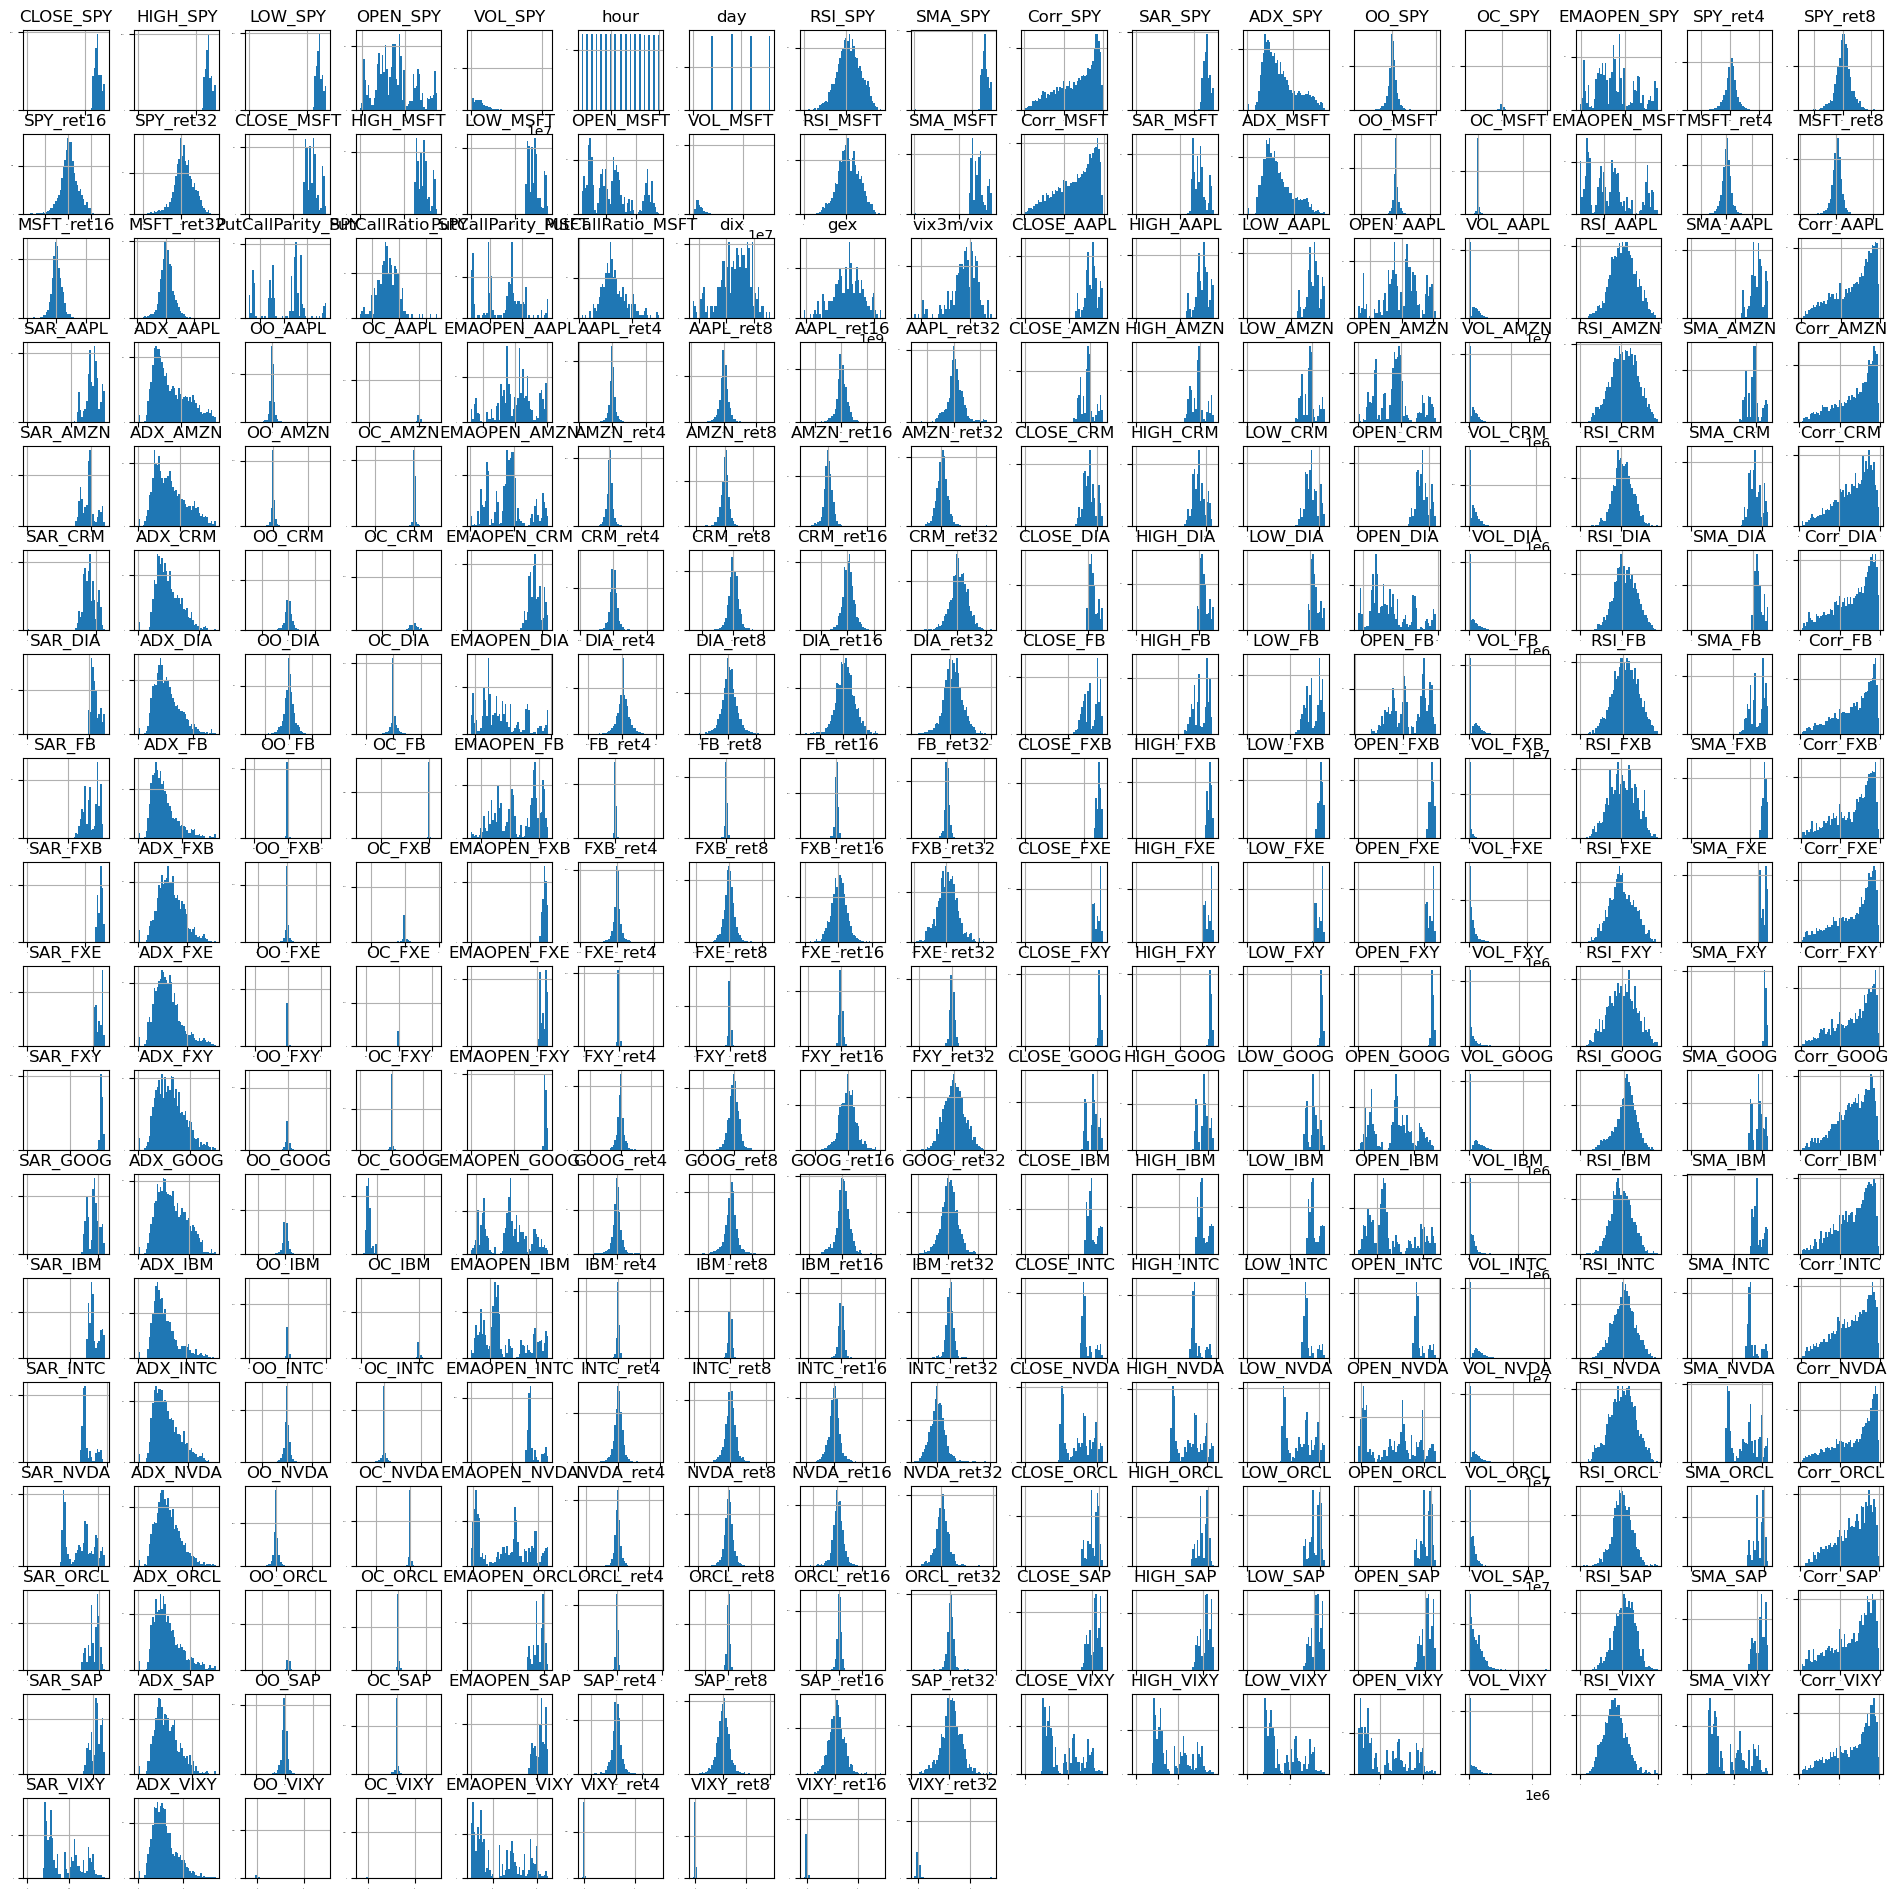

In [97]:
X.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(24, 24))
plt.show()

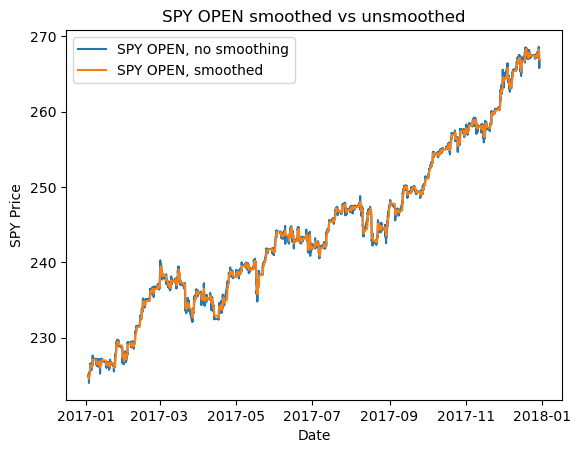

In [137]:
sns.lineplot(x = X.index, y = X.OPEN_SPY, label = "SPY OPEN, no smoothing")
sns.lineplot(x = X.index, y = X.EMAOPEN_SPY, label = "SPY OPEN, smoothed")
plt.xlabel("Date")
plt.ylabel("SPY Price")
plt.title("SPY OPEN smoothed vs unsmoothed")
plt.show()

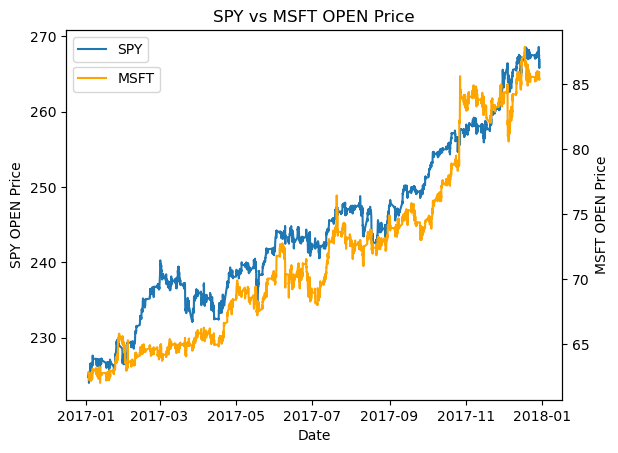

In [138]:
fig, ax1 = plt.subplots()

sns.lineplot(x = X.index, y = X.OPEN_SPY, label = "SPY", ax = ax1)
ax2 = ax1.twinx()
sns.lineplot(x = X.index, y = X.OPEN_MSFT, ax = ax2, label = "MSFT", color = 'orange')
ax1.set_xlabel("Date")
ax1.set_ylabel("SPY OPEN Price")
ax2.set_ylabel("MSFT OPEN Price")
ax1.legend(loc="upper left")
ax2.legend(loc="upper left", bbox_to_anchor = (0, 0, 0.5, 0.92))
plt.title("SPY vs MSFT OPEN Price")
plt.show()

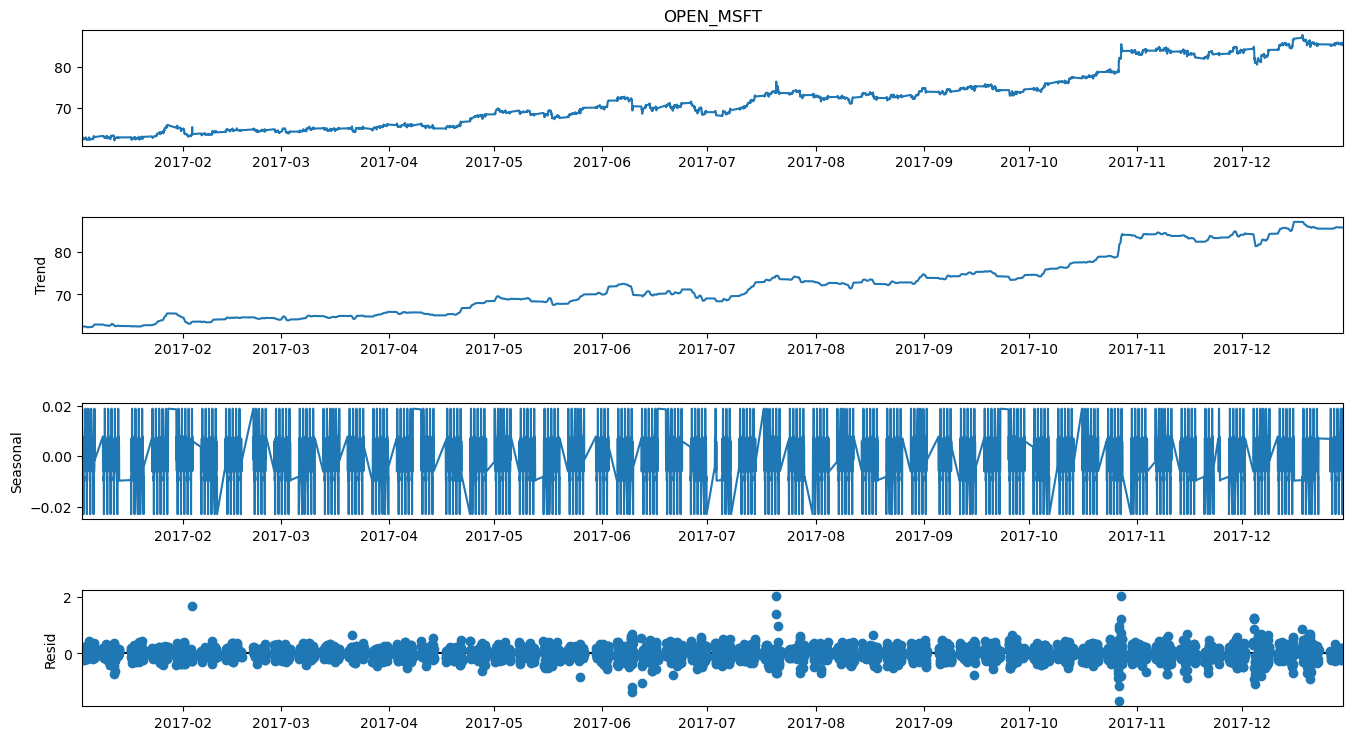

In [99]:
res = sm.tsa.seasonal_decompose(X.OPEN_MSFT, period = 16)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [100]:
# our data is time series so we don't want to split it up randomly, we want
# to preserve the time ordering. We have 4258 data points, so we will allocate
# 80%, or 3406 pts to the train/val set, and 20%, or 852 pts to the test set

X_train = X.iloc[0:3406]
y_train = y.retFut4_categ.iloc[0:3406]

X_test = X.iloc[3406:4259]
y_test = y.retFut4_categ.iloc[3406:4529]

In [101]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(3406, 298)
(3406,)
(852, 298)
(852,)


## Pipeline Creation

At this point we have a few things left to do before we can begin training models, however we will do them all in one go via pipelines. Our pipeline will consist of the following steps:

- Smoother*: Smooth out the pct ret features, reducing noise
- Encoder: encode the target for classification
- TALib optimization: optimize the period for TALib feature generation
- Scaler: Scale the data to 0 mean and unit variance
- Selector: Select only the most indicitive features for training.

**Note: We have already done some smoothing in the feature engineering stage by using a exponential weighted moving average to smooth the open prices of the data. We will smooth the returns via wavelets prior to the pipeline, as when I had it in the pipeline originally it was causing large issues. Due to the time constraints of this project I have opted to smooth the returns prior to the pipeline, however I recognize it would be better to have the wavelet function as part of the pipeline, as then we could tune the scale of the smoothing as a hyperparameter.*

For the selector, I chose to use SelectPercentile with f_classic as the score function as this is a supervised learning problem, and we have many many features, a large number of which are probably not that useful.

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from category_encoders import TargetEncoder
from scipy.special import ndtr
import pywt
import phik

import warnings
warnings.simplefilter('ignore')

In [103]:
assets = [aapl, amzn, crm, dia, fb, fxb, fxe, fxy, goog, ibm, intc, msft, nvda, orcl, sap, spy, vixy]
features = ["AAPL", "AMZN", "CRM", "DIA", "FB", "FXB", "FXE", "FXY", "GOOG",
            "IBM", "INTC", "MSFT", "NVDA", "ORCL", "SAP", "SPY", "VIXY"]

def RSI_ADX_optimizer(x, timeperiod=None, assets = assets, feature = features):
    for i in range(len(assets)):
        # cols = ['OPEN_' + feature[i], 'HIGH_' + feature[i], 'LOW_' + feature[i], 'RSI_' + feature[i], 'ADX_' + feature[i]]
        cols = talib_feature_names
        x = pd.DataFrame(x, columns = cols)
        x['RSI_' + feature[i]] = ta.RSI(np.array(x['OPEN_' + feature[i]]), timeperiod=timeperiod)
        x['ADX_' + feature[i]] = ta.ADX(np.array(x['HIGH_' + feature[i]]),np.array(x['LOW_' + feature[i]]), np.array(x['OPEN_' + feature[i]]), timeperiod=timeperiod)
        x = x.fillna(0)
    return x

def target_encoder (X, y):
    # use target encoding to encode the categorical features
    X_train_enc = pd.DataFrame(X, columns=X_train.columns)
    y_train_enc = X.join(y).retFut4_categ #do a join of x with y. Why?
    enc = TargetEncoder(cols=['hour', 'day'])
    # transform the datasets
    X_train_enc = enc.fit_transform(X_train_enc, y_train_enc)
    X_train_enc =X_train_enc.fillna(0)
    return X_train_enc


def wavelet_smoother(X_train, scale=0.25):
        wavelet = "db6"
        X_train = pd.DataFrame(X_train)
        df_wavelets = X_train.copy()
        
        for i in X_train.columns:
            signal = X_train[i]
            coefficients = pywt.wavedec(signal, wavelet, mode='per')
            coefficients[1:] = [pywt.threshold(i, value=scale*signal.max(), mode='soft') for i in coefficients[1:]]
            reconstructed_signal = pywt.waverec(coefficients, wavelet, mode='per')
            df_wavelets[i] = reconstructed_signal
        
        df_wavelets = df_wavelets.fillna(0)
        return df_wavelets

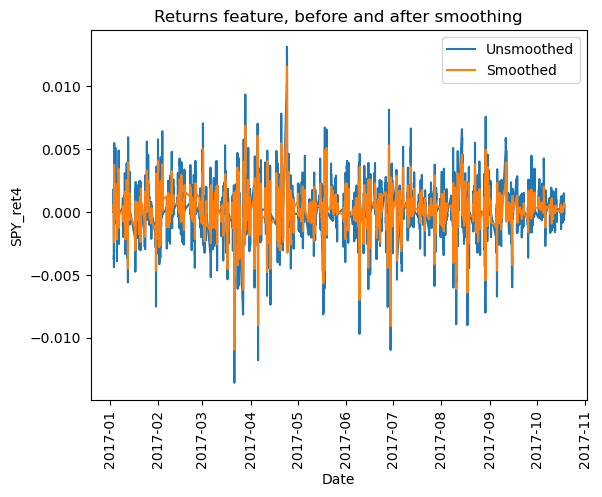

In [104]:
# we need to smooth the ret features using wavelets. Originally I had included this step in the pipeline,
# however, it began causing errors, and I did not have time to debug. So instead, I will smooth the ret features
# before hand and then pass it into the pipeline already smoothed. It is a bit less elegant and robust, but it
# should lead to the same result. Unfortunately it prevents us from tuning the scaling on the wavelets as a hyperparameter
# in gridsearch, so I will manually select a value I think looks good, and this will just be a limitation of this program.

X_smoothed = wavelet_smoother(X_train[window_features], scale = 0.1) # 0.1 scale looks good
sns.lineplot(x = X_train.index, y = X_train.SPY_ret4, label = "Unsmoothed")
sns.lineplot(x = X_train.index, y = X_smoothed.SPY_ret4, label = "Smoothed")
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.title("Returns feature, before and after smoothing")
plt.show()

X_train[window_features] = X_smoothed

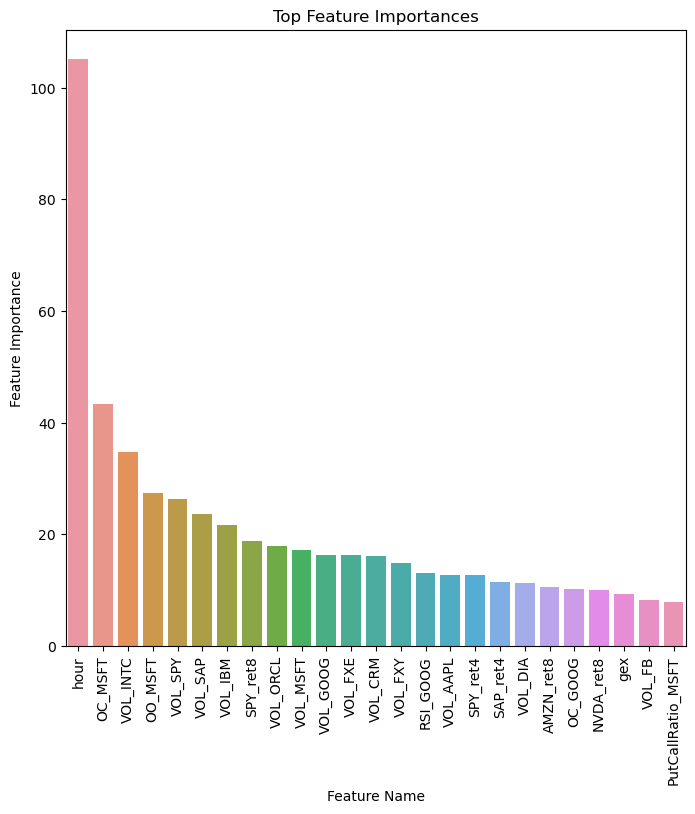

In [237]:
# I am going to do a separate feature selection method here just to better visualize the most important features.
# We are going to go with the top 100 features, which is arbitrary, but this is just to get a sense of what is 
# important and won't actually be used in the pipeline (pipeline uses SelectPercentile, although the features
# selected in both methods should be very similar).

k = 25
bestfeatures = SelectKBest(k = k)
fit = bestfeatures.fit(X_train, y_train)
importances = fit.scores_
importances = sorted(enumerate(importances), key = lambda x: abs(x[1]), reverse = True)
important_feature_names = X_train.iloc[:, [x[0] for x in importances[0:k]]].columns

feature_df = X_train[important_feature_names]

importance_scores = [importances[i][1] for i in range(k)]

importance_scores
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.barplot(x = important_feature_names, y = importance_scores)
ax.set_title("Top Feature Importances")
ax.set_ylabel("Feature Importance")
ax.set_xlabel("Feature Name")
plt.xticks(rotation = 90)
plt.show()

In [107]:
def phi_k(y_true, y_pred):
    dfc = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    try:
        phi_k_corr = dfc.phik_matrix(interval_cols=[]).iloc[1,0]
        phi_k_sig  = dfc.significance_matrix(interval_cols=[]).iloc[1,0]
        phi_k_p_val = 1 - ndtr(phi_k_sig) 
    except:
        phi_k_corr = 0
        phi_k_p_val = 0
        print("Phi_k EXCEPT statement hit.")
    #print(phi_k_corr)
    # print(phi_k_p_val)
    return phi_k_corr


def phi_k_select_helper(y, x):
    dfc = pd.DataFrame({'y_true': y, x.name: x})
    phi_k_corr = dfc.phik_matrix(interval_cols=[x.name]).iloc[1,0] 
    try:
        # phi_k_corr = dfc.phik_matrix(interval_cols=[x.name]).iloc[1,0]  
        phi_k_sig  = dfc.significance_matrix(interval_cols=[x.name]).iloc[1,0] 
        phi_k_p_val = 1 - ndtr(phi_k_sig) 
    except:
        phi_k_corr = 0
        phi_k_p_val = 0
        print("Phi_k_select_helper EXCEPT statement hit.")
    return phi_k_corr, phi_k_p_val


def phi_k_select(X, y):
    #Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores.
    #Model: https://archive.is/qxCbT
    # X = pd.DataFrame(X, columns=interval_cols)
    X = pd.DataFrame(X, columns=all_features_ix)
    rho_arr = np.zeros(X.shape[1])
    pval_arr = np.zeros(X.shape[1])
    for i in range(X.shape[1]):
        print(i)
        rho_arr[i], pval_arr[i] = phi_k_select_helper(y,X.iloc[:, i])
    return rho_arr, pval_arr

phi_k_scorer = make_scorer(phi_k, greater_is_better=True)
f1macro_scorer ="f1_macro"
tscv = TimeSeriesSplit(n_splits=5, max_train_size=2000)

In [108]:
rsiadx = FunctionTransformer(func = RSI_ADX_optimizer)
targetencoder = FunctionTransformer(func = target_encoder, kw_args={'y': y_train})

In [109]:
categorical_features_ix = ['hour', 'day']
numeric_features_ix = list(X_train.columns)
numeric_features_ix.remove('hour')
numeric_features_ix.remove('day')

all_features_ix = X_train.columns

talib_features_no = []
for c in talib_feature_names:
    talib_features_no.append(X_train.columns.get_loc(c))

window_features_no = []
for c in window_features:
    window_features_no.append(X_train.columns.get_loc(c))
    
categorical_features_no = []
for i in categorical_features_ix:
    categorical_features_no.append(X_train.columns.get_loc(i))
    
numeric_features_no = []
for i in numeric_features_ix:
    numeric_features_no.append(X_train.columns.get_loc(i))

all_features_no = []
for i in all_features_ix:
    all_features_no.append(X_train.columns.get_loc(i))
    
    
# interval_cols = X_train.select_dtypes(include=['float64']).columns.values.tolist() # continuous numerical values

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import f_classif
import time

In [111]:
encoder = ColumnTransformer(transformers = [('te', targetencoder, all_features_no)], remainder='passthrough')
talib = ColumnTransformer(transformers = [('rsiadx', rsiadx, talib_features_no)], remainder='passthrough')
selector = ColumnTransformer(transformers=[('sp', SelectPercentile(score_func = f_classif), numeric_features_no)], remainder = 'passthrough')
scaler = ColumnTransformer(transformers=[('scaler', StandardScaler(), numeric_features_no)], remainder='passthrough')

In [112]:
def train_and_score_model(pipeline, param_grid):
    # if random_cv:
    #     grid_search = RandomizedSearchCV(pipeline, param_grid = param_grid, cv = 5, scoring = 'f1_macro', return_train_score = True)
    # else:
    grid_search = GridSearchCV(pipeline, param_grid = param_grid, cv = tscv, scoring = "f1_macro", return_train_score=True)

    start = time.time()
    grid_search.fit(X_train, y_train.values.ravel())
    end = time.time()

    best_parameters = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_ * 100
    fit_time = end - start
    return (best_parameters, best_model, best_score, fit_time, grid_search.cv_results_)

In [113]:
lr = LogisticRegression()
ridge = LogisticRegression(penalty = 'l2')
lasso = LogisticRegression(penalty = 'l1', solver = 'saga')
elasticnet = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
mlp = MLPClassifier(max_iter = 100)
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
sgd = SGDClassifier(loss = "hinge", penalty = "l2")
gnb = GaussianNB()

lr_pg = {'lr__C': [0.001, 0.01, 0.1, 1], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
ridge_pg = {'lrl2__C': [0.001, 0.01, 0.1, 1], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
lasso_pg = {'lrl1__C': [0.001, 0.01, 0.1, 1], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
elasticnet_pg = {'elasticnet__l1_ratio': [0.25, 0.5, 0.75], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
knc_pg = {'knc__n_neighbors': [5, 10, 20], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
dtc_pg = {'dtc__max_depth': [10, 25, 50], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
svc_pg = {'svc__C': [0.001, 0.01, 0.1, 1], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
mlp_pg = {'mlp__hidden_layer_sizes': [(100,), (50,)], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
abc_pg = {'abc__learning_rate': [0.01, 0.1, 1], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
gbc_pg = {'gbc__learning_rate': [0.01, 0.1, 1], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
rfc_pg = {'rfc__n_estimators': [100, 250, 500], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
etc_pg = {'etc__n_estimators': [100, 250, 500], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
sgd_pg = {'sgd__alpha': [0.0001, 0.001, 0.01, 0.1], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
gnb_pg = {'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]} # no hyperparameters to tune for GaussianNB


models_list = {'lr': (lr, lr_pg),
               'lrl2': (ridge, ridge_pg),
               'lrl1': (lasso, lasso_pg),
               'elasticnet': (elasticnet, elasticnet_pg),
               'knc': (knc, knc_pg),
               'dtc': (dtc, dtc_pg),
               'svc': (svc, svc_pg),
               'mlp': (mlp, mlp_pg),
               'abc': (abc, abc_pg),
               'gbc': (gbc, gbc_pg),
               'rfc': (rfc, rfc_pg),
               'etc': (etc, etc_pg),
               'sgd': (sgd, sgd_pg),
               'gnb': (gnb, gnb_pg)}


# Iterate through every key-value pair in the dictionary and build your pipelines:
model_cvs = {}
for model_name, model_info in models_list.items():
        classifier_pipe = Pipeline(steps = [
        ('encoder', encoder),
        ('talib', talib),
        ('scaler', scaler),
        ('selector', selector),
        (model_name, model_info[0])])
        model_cvs[model_name] = train_and_score_model(pipeline = classifier_pipe, param_grid = model_info[1])
        print("completed training", model_name)

completed training lr
completed training lrl2
completed training lrl1
completed training elasticnet
completed training knc
completed training dtc
completed training svc
completed training mlp
completed training abc
completed training gbc
completed training rfc
completed training etc
completed training sgd
completed training gnb


In [140]:
model_name_ = []
model_score_ = []
for model_name, model_info in models_list.items():
    model_name_.append(model_name)
    model_score_.append(model_cvs[model_name][2])
    print(model_cvs[model_name][2])

38.86374995286345
38.86374995286345
33.6341557863728
33.58285047965708
33.69014967646836
35.51209689009417
19.413280812352994
37.20157558788967
36.89870166624148
36.15546952083855
33.45999633835795
31.452960888438735
25.876564317247606
27.642532732255226


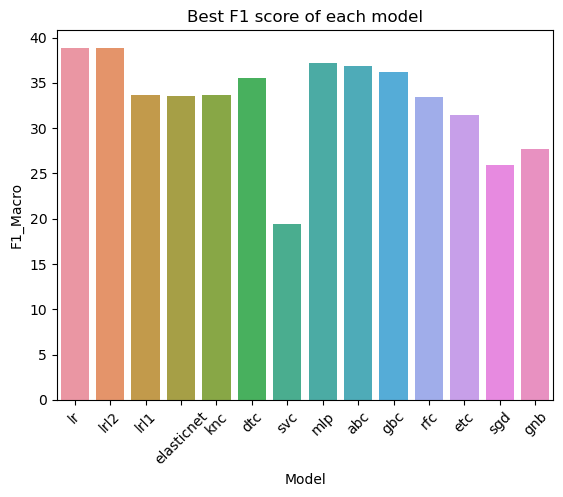

In [143]:
sns.barplot(x = model_name_, y = model_score_)
plt.xticks(rotation = 45)
plt.title("Best F1 score of each model")
plt.xlabel("Model")
plt.ylabel("F1_Macro")
plt.show()

In [116]:
model_results = pd.DataFrame.from_dict(model_cvs, orient="index", columns = ['best_params', 'best_model', 'best_score', 'fit_time', 'gridsearch_results'])
model_results.to_csv("model_comparison_results")

## Model Comparison

The best model appears to be logistic regression, with an f1_macro of ~38.8 (Ridge Regression has the same score). The MLPClassifier also looks very promising at ~37.2. We will select these two models to proceed, and will train them further in order to achieve a final model which we can try out on the test set.

In [117]:
lr = LogisticRegression()
mlp = MLPClassifier(learning_rate = 'adaptive')

lr_pg = {'lr__C': [0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}
mlp_pg = {'mlp__hidden_layer_sizes': [(100,), (200,), (300,), (20, 20, 2)], 'mlp__learning_rate_init': [0.001, 0.01], 'selector__sp__percentile': [50, 75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}, {'timeperiod': 10}]}


final_models_list = {'lr': (lr, lr_pg), 'mlp': (mlp, mlp_pg)}

# Iterate through every key-value pair in the dictionary and build your pipelines:
final_model_cvs = {}
for model_name, model_info in final_models_list.items():
        classifier_pipe = Pipeline(steps = [
        ('encoder', encoder),
        ('talib', talib),
        ('scaler', scaler),
        ('selector', selector),
        (model_name, model_info[0])])
        final_model_cvs[model_name] = train_and_score_model(pipeline = classifier_pipe, param_grid = model_info[1])
        print("completed training", model_name)

completed training lr
completed training mlp


In [144]:
model_name_ = []
model_score_ = []
for model_name, model_info in final_models_list.items():
    model_name_.append(model_name)
    model_score_.append(final_model_cvs[model_name][2])
    print(final_model_cvs[model_name][2])

39.92023799321679
36.88747049415998


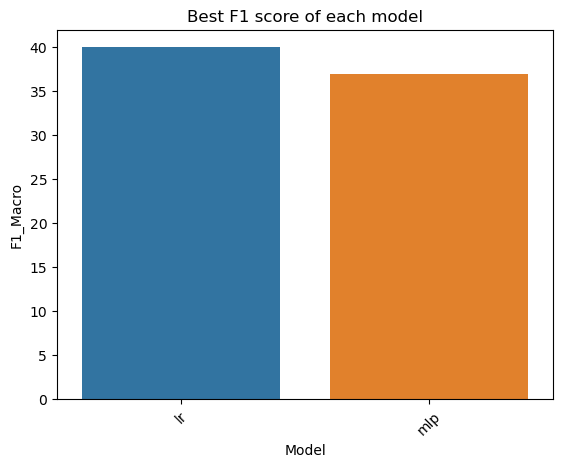

In [145]:
sns.barplot(x = model_name_, y = model_score_)
plt.xticks(rotation = 45)
plt.title("Best F1 score of each model")
plt.xlabel("Model")
plt.ylabel("F1_Macro")
plt.show()

In [119]:
final_model_results = pd.DataFrame.from_dict(final_model_cvs, orient="index", columns = ['best_params', 'best_model', 'best_score', 'fit_time', 'gridsearch_results'])
final_model_results.to_csv("final_model_comparison_results")

In [152]:
final_model_results

,best_params,best_model,best_score,fit_time,gridsearch_results
lr,"{'lr__C': 0.004, 'selector__sp__percentile': 5...","(ColumnTransformer(remainder='passthrough',\n ...",39.920238,32.867561,"{'mean_fit_time': [0.12036218643188476, 0.1229..."
mlp,"{'mlp__hidden_layer_sizes': (100,), 'mlp__lear...","(ColumnTransformer(remainder='passthrough',\n ...",36.887470,125.773976,"{'mean_fit_time': [0.5397018909454345, 0.52780..."


## Model Evaluation

Linear Regression is still better with an f1 score of 39.92, and will be the final model. We can take a look at the gridsearch results to get our train and validation curves across the cross validation, and then we will predict on the test set. Finally we will evaluate these predictions using White Reality Check, CAGR, and Sharpe Ratio.

In [121]:
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from phik.report import plot_correlation_matrix

In [203]:
lr_best_pg = {'lr__C': [0.004], 'selector__sp__percentile': [50], 'talib__rsiadx__kw_args': [{'timeperiod': 5}]}
mlp_best_pg = {'mlp__hidden_layer_sizes': [(100,)], 'mlp__learning_rate_init': [0.01], 'selector__sp__percentile': [75], 'talib__rsiadx__kw_args': [{'timeperiod': 5}]}

# classifier_pipe = Pipeline(steps = [
# ('encoder', encoder),
# ('talib', talib),
# ('scaler', scaler),
# ('selector', selector),
# ('lr', LogisticRegression())])

classifier_pipe = Pipeline(steps = [
('encoder', encoder),
('talib', talib),
('scaler', scaler),
('selector', selector),
('mlp', MLPClassifier(random_state = 1))])

final_model_out = train_and_score_model(pipeline = classifier_pipe, param_grid = mlp_best_pg)

In [204]:
final_model_out[4]

train_scores = []
val_scores = []

train_scores.append(final_model_out[4]['split0_train_score'][0])
train_scores.append(final_model_out[4]['split1_train_score'][0])
train_scores.append(final_model_out[4]['split2_train_score'][0])
train_scores.append(final_model_out[4]['split3_train_score'][0])
train_scores.append(final_model_out[4]['split4_train_score'][0])

val_scores.append(final_model_out[4]['split0_test_score'][0])
val_scores.append(final_model_out[4]['split1_test_score'][0])
val_scores.append(final_model_out[4]['split2_test_score'][0])
val_scores.append(final_model_out[4]['split3_test_score'][0])
val_scores.append(final_model_out[4]['split4_test_score'][0])

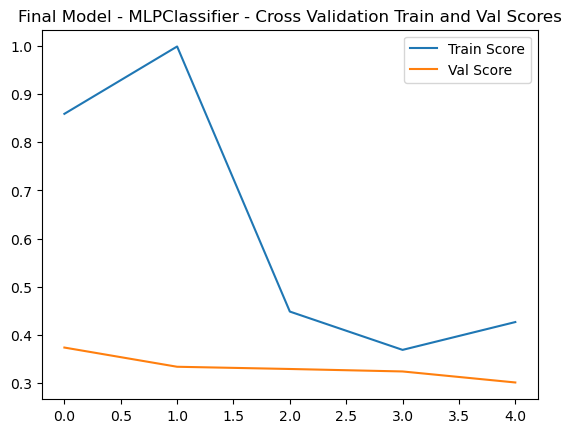

In [216]:
sns.lineplot(x = [i for i in range(5)], y = train_scores, label = "Train Score")
sns.lineplot(x = [i for i in range(5)], y = val_scores, label = "Val Score")
plt.title("Final Model - MLPClassifier - Cross Validation Train and Val Scores")
plt.show()

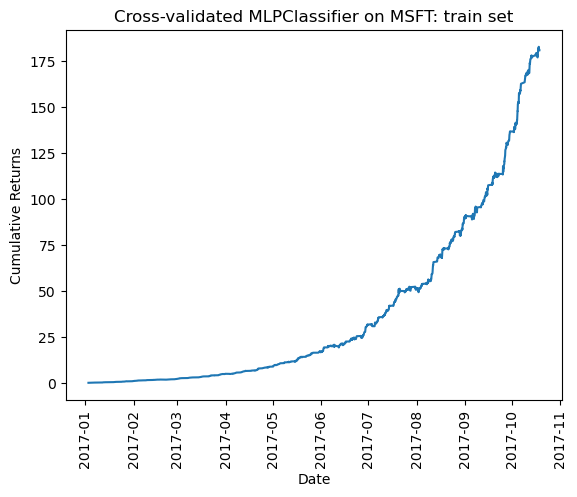

In [217]:
positions = np.where(final_model_out[1].predict(X_train)> 0, 1, -1) #POSITIONS

dailyRet = pd.Series(positions).fillna(0).values * y.retFut4_MSFT.iloc[0:3406] #for trading right after the open

dailyRet = dailyRet.fillna(0)

cumret = np.cumprod(dailyRet + 1) - 1

plt.plot(cumret.index, cumret)
plt.title('Cross-validated MLPClassifier on MSFT: train set')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.savefig(r'Results\%s.png' %("TrainCumulative"))

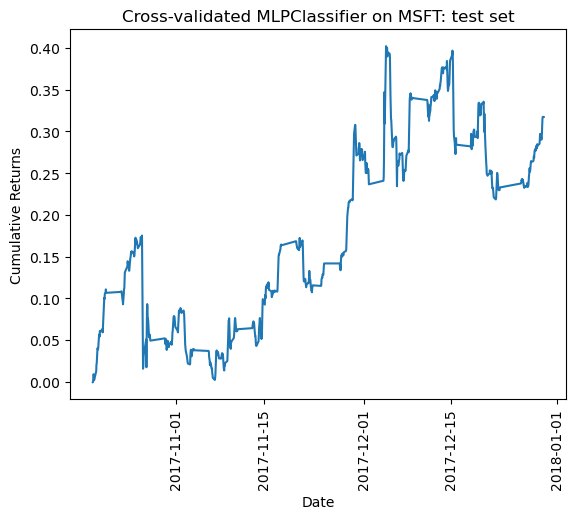

In [219]:
positions2 = np.where(final_model_out[1].predict(X_test) > 0, 1, -1) #POSITIONS

dailyRet2 = pd.Series(positions2).fillna(0).values * y.retFut4_MSFT.iloc[3406:4529] #for trading right after the open
dailyRet2 = dailyRet2.fillna(0)

cumret2 = np.cumprod(dailyRet2 + 1) - 1

plt.plot(cumret2.index, cumret2)
title = 'Cross-validated MLPClassifier on MSFT: test set'
plt.title(title)
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.savefig(r'Results\%s.png' %("TestCumulative"))

In [235]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [236]:
accuracy = accuracy_score(y_test.values.ravel(), final_model_out[1].predict(X_test))
f1 = f1_score(y_test.values.ravel(), final_model_out[1].predict(X_test), average = 'macro')
precision = precision_score(y_test.values.ravel(), final_model_out[1].predict(X_test), average = 'macro')
recall = recall_score(y_test.values.ravel(), final_model_out[1].predict(X_test), average = 'macro')
print(accuracy)
print(f1)
print(precision)
print(recall)

0.4061032863849765
0.3397561946966223
0.40878466655886275
0.3944756058107017


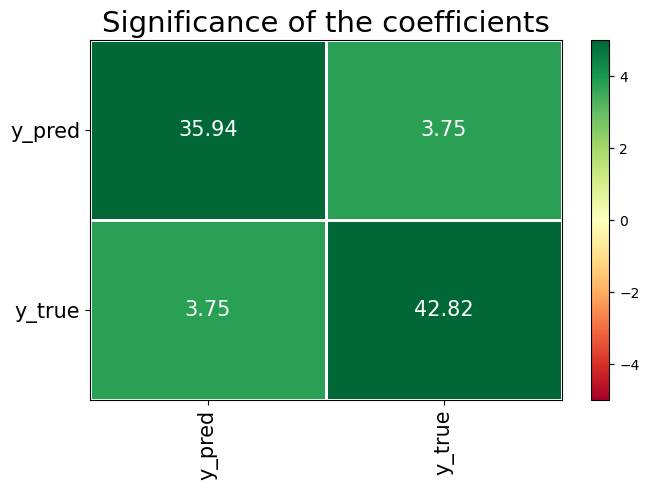

In [209]:
arr1 = y_test.values.ravel()
arr2 = final_model_out[1].predict(X_test)
dfc = pd.DataFrame({'y_true': arr1, 'y_pred': arr2})
phi_k_corr = dfc.phik_matrix(interval_cols=[]).iloc[1,0]
significance_overview = dfc.significance_matrix(interval_cols=[])
phi_k_sig  = dfc.significance_matrix(interval_cols=[]).iloc[1,0]
phi_k_p_val = 1 - ndtr(phi_k_sig) 
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(7, 5))
plt.tight_layout()
#plt.show()
plt.savefig(r'Results\%s.png' %("PhikSignificance"))

In [210]:
def backshift(day,x):
    assert day > 0,'Invalid day'
    shift = np.zeros((np.shape(x)))
    shift[day:] = x[:-day]
    shift[shift==0] = np.nan
    return shift

def calculateReturns(prices, lag):
    prevPrices = backshift(lag, prices)
    rlag = (prices - prevPrices) / prevPrices
    return rlag

def fwdshift(day,x):
    assert day > 0,'Invalid day'
    shift = np.zeros((np.shape(x)))
    shift[:-day] = x[day:]
    shift[shift==0] = np.nan
    return shift

def calculateMaxDD(cumret):
    highwatermark = np.zeros(len(cumret))
    drawdown      = np.zeros(len(cumret))
    drawdownduration = np.zeros(len(cumret))
    for t in range(1, len(cumret)):
        highwatermark[t] = np.max([highwatermark[t-1], cumret[t]])
        drawdown[t] = (1+cumret[t]) / (1 + highwatermark[t]) - 1
        if (drawdown[t]==0):
            drawdownduration[t] = 0
        else:
            drawdownduration[t] = drawdownduration[t-1] + 1
    return np.min(drawdown), np.max(drawdownduration)

In [211]:
cagr = (1 + cumret2[-1]) ** (252 / len(cumret2)) - 1
maxDD, maxDDD = calculateMaxDD(cumret2)
ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet2) / np.std(dailyRet2)

print("Out of sample CAGR:", cagr)
print("Sharpe Ratio:", ratio)
print("maxDD:", maxDD)
print("maxDDD:", maxDDD.astype(int))
print("Calmar Ratio:", -1 * cagr / maxDD)
print("Phi K Corr:", phi_k_corr)
print("Phi K p val:", phi_k_p_val)
print("Accuracy Score:", accuracy)
# print (('Out-of-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}  phi_k_corr={:0.6} phi_k_p_val={:0.6}  accuracy_score={:0.6}\n'\
# ).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD, phi_k_corr, phi_k_p_val, accuracy_score))

Out of sample CAGR: 0.08491804535990477
Sharpe Ratio: 0.8973268489764376
maxDD: -0.14721235800064125
maxDDD: 364
Calmar Ratio: 0.5768404671538164
Phi K Corr: 0.3173019824785765
Phi K p val: 9.956152873269453e-05
Accuracy Score: 0.4061032863849765


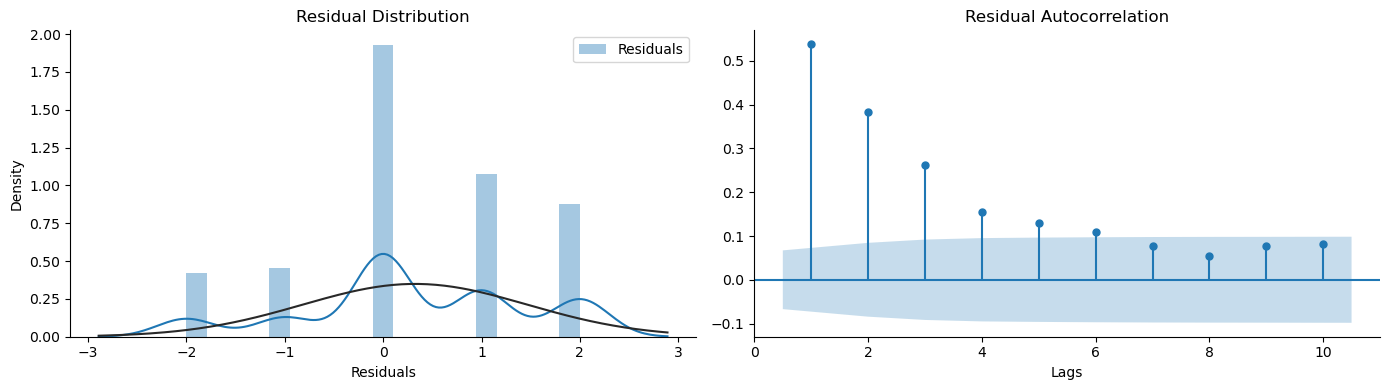

<Figure size 640x480 with 0 Axes>

In [212]:
true_y = y_test.values.ravel()
pred_y = final_model_out[1].predict(X_test)
residuals = np.subtract(true_y, pred_y)


from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=10, zero=False, ax=axes[1], title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout();
plt.show()
plt.savefig(r'Results\%s.png' %("ResidualDistribution"))

In [213]:
import statsmodels.api as sm
lb = sm.stats.acorr_ljungbox(residuals, lags=[10], boxpierce=False)
print("Ljung-Box test p-value", lb[1])

# p value <0.05 therefore residuals are dependant

Ljung-Box test p-value [2.65688311e-100]


In [214]:
def detrendPrice(series):
    # fit linear model
    length = len(series)
    x = np.arange(length)
    y = np.array(series.values)
    x_const = sm.add_constant(x) #need to add intercept constant
    model = sm.OLS(y,x_const)
    result = model.fit()
    #y = pd.Series(y)
    #intercept = result.params[0]
    #beta = result.params[1]
    #print(result.summary())
    df = pd.DataFrame(result.params*x_const)
    y_hat = df[0] + df[1]
    #the residuals are the detrended prices
    resid = y-y_hat
    #add minimum necessary to residuals to avoid negative detrended prices
    resid = resid + abs(resid.min() + 1/10*resid.min())
    return resid 


def bootstrap(ser):
    ser.dropna(inplace=True)
    arr = np.array(ser.values)
    alpha = .05*100 #significance alpha
    reps = 5000 #how many bootstrapings, 50000 limit if you have 8GB RAM

    percentile = 100-alpha
    ave = np.average(arr) #arithmetic mean

    print("average return %f" %ave)

    #ave = ms.gmean(arr) #geometric mean

    centered_arr = arr-ave
    n = len(centered_arr)
    #constructs 50000 alternative return histories and calculates their theoretical averages
    xb = np.random.choice(centered_arr, (n, reps), replace=True)
    mb = xb.mean(axis=0) #arithmetic mean
    #mb = ms.gmean(mb, axis=0) #geometric mean

    #sorts the 50000 averages
    mb.sort()
    #calculates the 95% conficence interval (two tails) threshold for the theoretical averages
    print(np.percentile(mb, [2.5, 97.5])) 
    threshold = np.percentile(mb, [percentile])[0]


    if ave > threshold:
        print("Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)")
    else:
        print("Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)")

    #count will be the items i that are smaller than ave
    count_vals = 0
    for i in mb:
        count_vals += 1
        if i > ave:
            break
        
    #p is based on the count that are larger than ave so 1-count is needed:
    p = 1-count_vals/len(mb)

    print("p_value:")
    print(p)


    
    #histogram
    sr = pd.Series(mb)
    desc = sr.describe()
    count = desc[0]
    std = desc[2]
    minim = desc[3]
    maxim = desc[7]
    R = maxim-minim
    n = count
    s = std
    bins = int(round(R*(n**(1/3))/(3.49*std),0))
    fig = sr.hist(bins=bins)
   # plt.show()
    

    #about the histogram
    #https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram
    #R(n^(1/3))/(3.49σ)
    #R is the range of data (in your case R = 3-(-3)= 6),
    #n is the number of samples,
    #σ is your standard deviation.


average return -0.027074
[-0.02743523  0.02196474]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.973


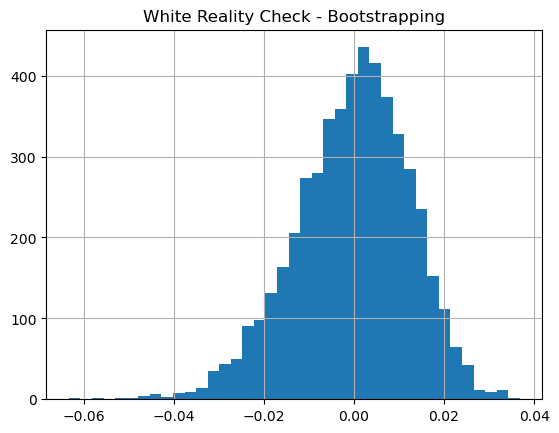

In [220]:
detrended_open = detrendPrice(msft_open[3406:4529])
detrended_retFut4 = detrended_open.pct_change(periods=4).shift(-4).fillna(0)
detrended_syst_rets = detrended_retFut4 * pd.Series(positions2).fillna(0)
bootstrap(detrended_syst_rets) # white reality check
plt.title("White Reality Check - Bootstrapping")
plt.show()